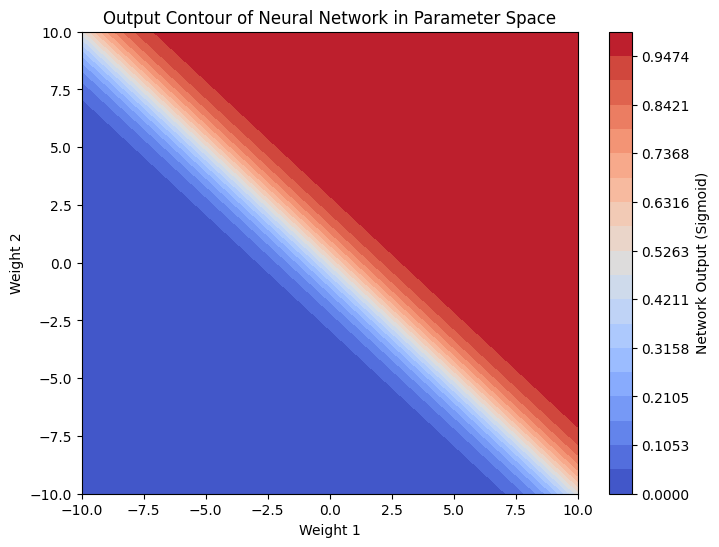

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Simple network with a single layer (linear) and sigmoid activation
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        # Two parameters: weights (w1, w2) and a bias (b)
        self.fc = nn.Linear(2, 1)  # 2 input dimensions, 1 output
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.fc(x)
        return self.sigmoid(x)

# Initialize the network
net = SimpleNet()

# Define a fixed input point
input_point = torch.tensor([1.0, 1.0])  # 2D input

# Generate a grid of weights and biases
w1_range = torch.linspace(-10, 10, 100)
w2_range = torch.linspace(-10, 10, 100)
output_grid = np.zeros((100, 100))

# Fix the bias to 0 for visualization purposes
fixed_bias = 0.0
net.fc.bias.data.fill_(fixed_bias)

# Iterate over the grid of weight values
for i, w1 in enumerate(w1_range):
    for j, w2 in enumerate(w2_range):
        net.fc.weight.data = torch.tensor([[w1, w2]])  # Set the weights
        output = net(input_point).item()  # Forward pass through the network
        output_grid[i, j] = output  # Store the output

# Plot the contour map of the output in the parameter space
plt.figure(figsize=(8, 6))
plt.contourf(w1_range.numpy(), w2_range.numpy(), output_grid, levels=np.linspace(0, 1, 20), cmap="coolwarm")
plt.colorbar(label="Network Output (Sigmoid)")
plt.xlabel("Weight 1")
plt.ylabel("Weight 2")
plt.title("Output Contour of Neural Network in Parameter Space")
plt.show()


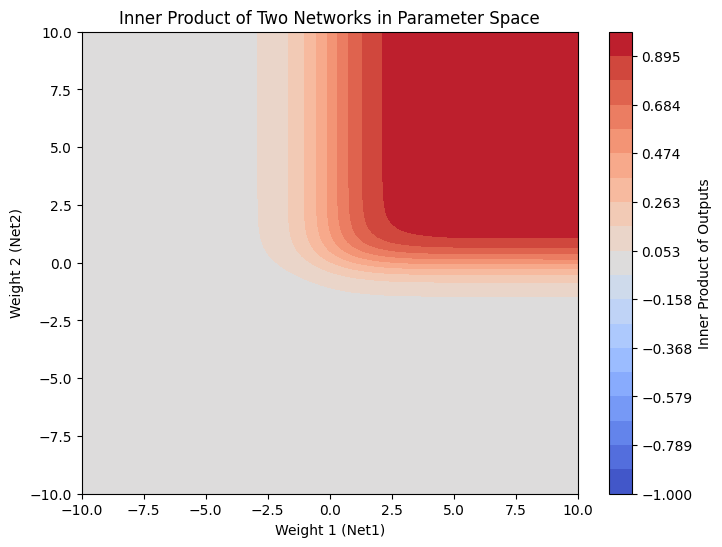

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Define two simple neural networks
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc = nn.Linear(2, 1)  # Simple linear layer
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        return self.sigmoid(self.fc(x))

# Initialize two networks
net1 = SimpleNet()
net2 = SimpleNet()

# Define two fixed input points
input1 = torch.tensor([1.0, 1.0])
input2 = torch.tensor([2.0, -1.0])

# Generate a grid of weights for net1 and net2
w1_range = torch.linspace(-10, 10, 100)
w2_range = torch.linspace(-10, 10, 100)
inner_product_grid = np.zeros((100, 100))

# Fix biases to 0 for simplicity
net1.fc.bias.data.fill_(0.0)
net2.fc.bias.data.fill_(0.0)

# Iterate over the grid of weight values
for i, w1 in enumerate(w1_range):
    for j, w2 in enumerate(w2_range):
        net1.fc.weight.data = torch.tensor([[w1, w1]])  # Same weight for both inputs
        net2.fc.weight.data = torch.tensor([[w2, w2]])  # Same weight for both inputs
        
        output1 = net1(input1).item()  # Forward pass through net1
        output2 = net2(input2).item()  # Forward pass through net2
        
        # Compute inner product (in this case, just product since scalar output)
        inner_product = output1 * output2
        inner_product_grid[i, j] = inner_product  # Store the result

# Plot the inner product as a contour map
plt.figure(figsize=(8, 6))
plt.contourf(w1_range.numpy(), w2_range.numpy(), inner_product_grid, levels=np.linspace(-1, 1, 20), cmap="coolwarm")
plt.colorbar(label="Inner Product of Outputs")
plt.xlabel("Weight 1 (Net1)")
plt.ylabel("Weight 2 (Net2)")
plt.title("Inner Product of Two Networks in Parameter Space")
plt.show()


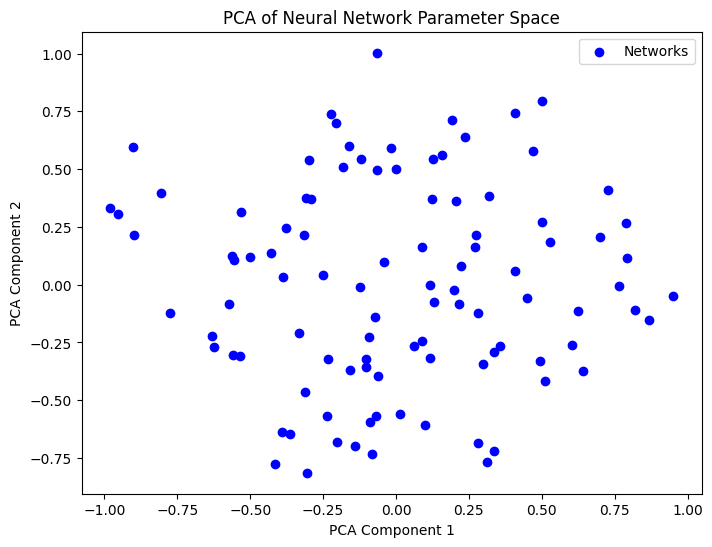

In [3]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Simple example network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc = nn.Linear(2, 1)
    
    def forward(self, x):
        return self.fc(x)

# Generate several networks with different random initializations
num_networks = 100
networks = [SimpleNet() for _ in range(num_networks)]

# Collect parameters (flattened) from each network
param_list = []
for net in networks:
    params = []
    for param in net.parameters():
        params.append(param.data.flatten())
    param_list.append(torch.cat(params).numpy())

# Convert to a matrix of shape (num_networks, num_params)
param_matrix = np.vstack(param_list)

# Apply PCA to reduce the dimensionality to 2D or 3D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(param_matrix)

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', label="Networks")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA of Neural Network Parameter Space")
plt.legend()
plt.show()


Initial loss (net1 and net2 are identical): 0.0000
Found functionally similar network with loss: 0.0037
Found functionally similar network with loss: 0.0036


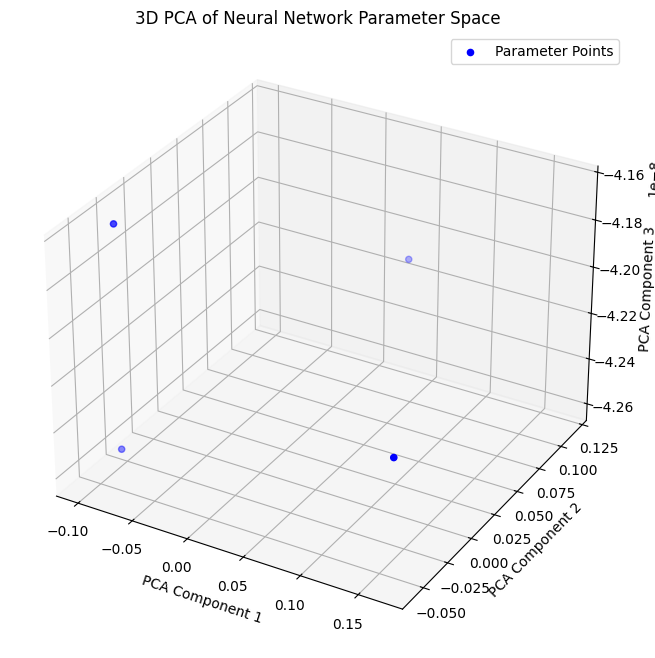

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define two simple neural networks
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2, 3)
        self.fc2 = nn.Linear(3, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Loss function to measure output similarity between two networks
def similarity_loss(output1, output2):
    return torch.mean((output1 - output2) ** 2)

# Function to compare networks on a set of inputs
def compare_networks(net1, net2, inputs):
    net1.eval()
    net2.eval()
    with torch.no_grad():
        output1 = net1(inputs)
        output2 = net2(inputs)
    loss = similarity_loss(output1, output2).item()
    return loss

# Function to perturb the parameters of a network
def perturb_network(net, perturbation_scale=0.1):
    for param in net.parameters():
        param.data += perturbation_scale * torch.randn_like(param)

# Inputs for both networks
inputs = torch.tensor([[1.0, 1.0], [2.0, -1.0], [-1.0, -2.0], [0.5, 0.5]])

# Initialize two networks with identical parameters
net1 = SimpleNet()
net2 = SimpleNet()

# Copy the parameters of net1 to net2
net2.load_state_dict(net1.state_dict())

# Initial loss between the networks (should be 0)
initial_loss = compare_networks(net1, net2, inputs)
print(f'Initial loss (net1 and net2 are identical): {initial_loss:.4f}')

# Collect parameter vectors for visualization
param_list = []

def get_flattened_params(net):
    params = []
    for param in net.parameters():
        params.append(param.data.flatten())
    return torch.cat(params).numpy()

# Collect initial parameters (identical networks)
param_list.append(get_flattened_params(net1))  # net1 params
param_list.append(get_flattened_params(net2))  # net2 params

# Perturb net2's parameters and collect points where the networks still behave the same
threshold = 0.01  # Define a threshold for how close outputs should be
perturbations = 100  # Number of perturbations to try
perturbation_scale = 0.05  # Magnitude of parameter perturbation

for _ in range(perturbations):
    # Perturb net2
    perturb_network(net2, perturbation_scale)
    
    # Compare outputs of net1 and net2 on the inputs
    loss = compare_networks(net1, net2, inputs)
    
    # If the loss is below the threshold, consider them as representing the same function
    if loss < threshold:
        param_list.append(get_flattened_params(net2))
        print(f'Found functionally similar network with loss: {loss:.4f}')

# Apply PCA to reduce the dimensionality of the parameter space
param_matrix = np.vstack(param_list)  # Shape: (num_samples, num_params)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(param_matrix)

# Visualize the 3D projection of the parameters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c='blue', label="Parameter Points")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("3D PCA of Neural Network Parameter Space")
plt.legend()
plt.show()
